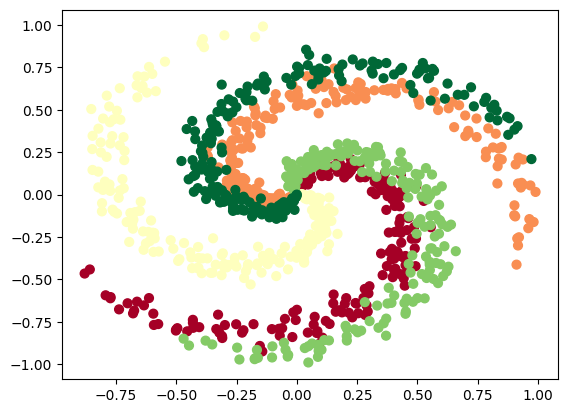

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N = 200
D = 2
K = 5
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlGn)
plt.show()

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device} | Torch version: {torch.__version__}")

Device: cuda | Torch version: 2.0.1+cu118


In [ ]:
from sklearn.model_selection import train_test_split
X=torch.from_numpy(X).to(device).type(torch.float)
y=torch.from_numpy(y).to(device).type(torch.long)
RANDOM_STATE=42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)

In [ ]:
class multiple_selection(nn.Module):
  def __init__(self, input, output, hidden):
    super().__init__()
    self.Liniar_secvential = nn.Sequential(
        nn.Linear(in_features=input,out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden,out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden,out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden,out_features=output)
    )
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.Liniar_secvential(x)

model = multiple_selection(input=X.size()[1],output=K,hidden=256).to(device)

In [ ]:
#PREDICTIONS
model.eval()
with torch.inference_mode():
  y_logits = model(X_test)
m=nn.Softmax(dim=1)
y_prob = m(y_logits)
y_prob_preds = torch.argmax(y_prob,dim=1)
print(y_prob_preds[:5])

tensor([2, 3, 3, 3, 3], device='cuda:0')


In [ ]:
#loss and optimizer functions
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

from sklearn.metrics import accuracy_score

In [ ]:
epochs = 2000
m=nn.Softmax(dim=1)
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)
  y_activation=m(y_logits)
  y_probs = torch.argmax(y_activation, dim=1)
  loss = loss_function(y_logits,y_train)
  acc = accuracy_score(y_true=y_train.cpu(),y_pred = y_probs.cpu())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc}")

Epoch: 0 | Loss: 0.04290575161576271 | Accuracy: 0.98375
Epoch: 100 | Loss: 0.0818936824798584 | Accuracy: 0.96625
Epoch: 200 | Loss: 0.04806443676352501 | Accuracy: 0.9825
Epoch: 300 | Loss: 0.04037939012050629 | Accuracy: 0.985
Epoch: 400 | Loss: 0.06036216765642166 | Accuracy: 0.98
Epoch: 500 | Loss: 0.05671334266662598 | Accuracy: 0.98375
Epoch: 600 | Loss: 0.04159465804696083 | Accuracy: 0.985
Epoch: 700 | Loss: 0.03732301667332649 | Accuracy: 0.985
Epoch: 800 | Loss: 0.03146279230713844 | Accuracy: 0.99
Epoch: 900 | Loss: 0.05721108615398407 | Accuracy: 0.97375
Epoch: 1000 | Loss: 0.03217002749443054 | Accuracy: 0.99
Epoch: 1100 | Loss: 0.027402542531490326 | Accuracy: 0.99125
Epoch: 1200 | Loss: 0.022227151319384575 | Accuracy: 0.99375
Epoch: 1300 | Loss: 0.04890362173318863 | Accuracy: 0.985
Epoch: 1400 | Loss: 0.02793411910533905 | Accuracy: 0.9925
Epoch: 1500 | Loss: 0.023966072127223015 | Accuracy: 0.99375
Epoch: 1600 | Loss: 0.020798979327082634 | Accuracy: 0.995
Epoch: 170

In [ ]:
import requests
from pathlib import Path

if Path("Helper_functions.py").is_file():
  print("The file already exists")
else:
  print("start to download the file: 0% ... 100%")
  requests=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("Helper_functions.py","wb") as file:
    file.write(requests.content)

import Helper_functions
from Helper_functions import plot_decision_boundary

start to download the file: 0% ... 100%


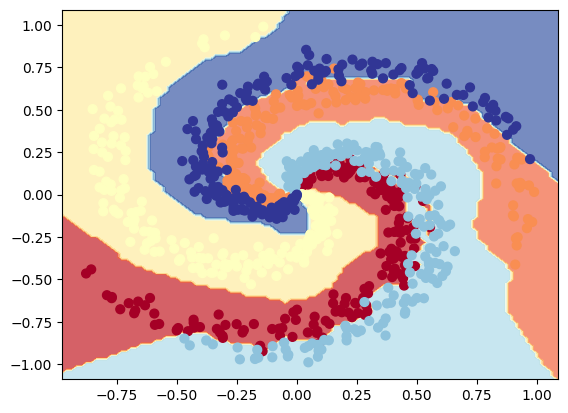

In [ ]:
plot_decision_boundary(model,X,y)